# Project Description:
# Problem statement: 
## Create a classification model to predict the sentiment either (1 or 0) based on Amazon Alexa reviews
# Context: 
## This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis.
# Dataset:
## https://drive.google.com/file/d/1qlexThSUFQkl-KOorFI4sh66SYeYBd79/view?usp=share_link
# Details of features:
## 1. The columns are described as follows:
## 2. rating: Product rating
## 3. Date: date on which the product was rated
## 4. variation: variation of the product
## 5. verfified_reviews: the verified reviews for the alexa
## 6. feedback: 1(Positive) or 0 (Negative)

In [53]:
#import required library
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Data set load
df=pd.read_csv("C:/Users/reddy/OneDrive/Desktop/verzeo/datasets/amazon_alexa_data.csv")

In [3]:
df.shape

(3150, 6)

In [4]:
df.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.tail()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


# checking null values

In [7]:
df.isnull().sum()

Unnamed: 0          0
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,rating,feedback
count,3150.000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413
std,909.471,1.068506,0.273778
min,0.000,1.000000,0.000000
25%,787.250,4.000000,1.000000
50%,1574.500,5.000000,1.000000
75%,2361.750,5.000000,1.000000
max,3149.000,5.000000,1.000000


# checking Duplicates

In [9]:
df.duplicated().sum()

0

<AxesSubplot:>

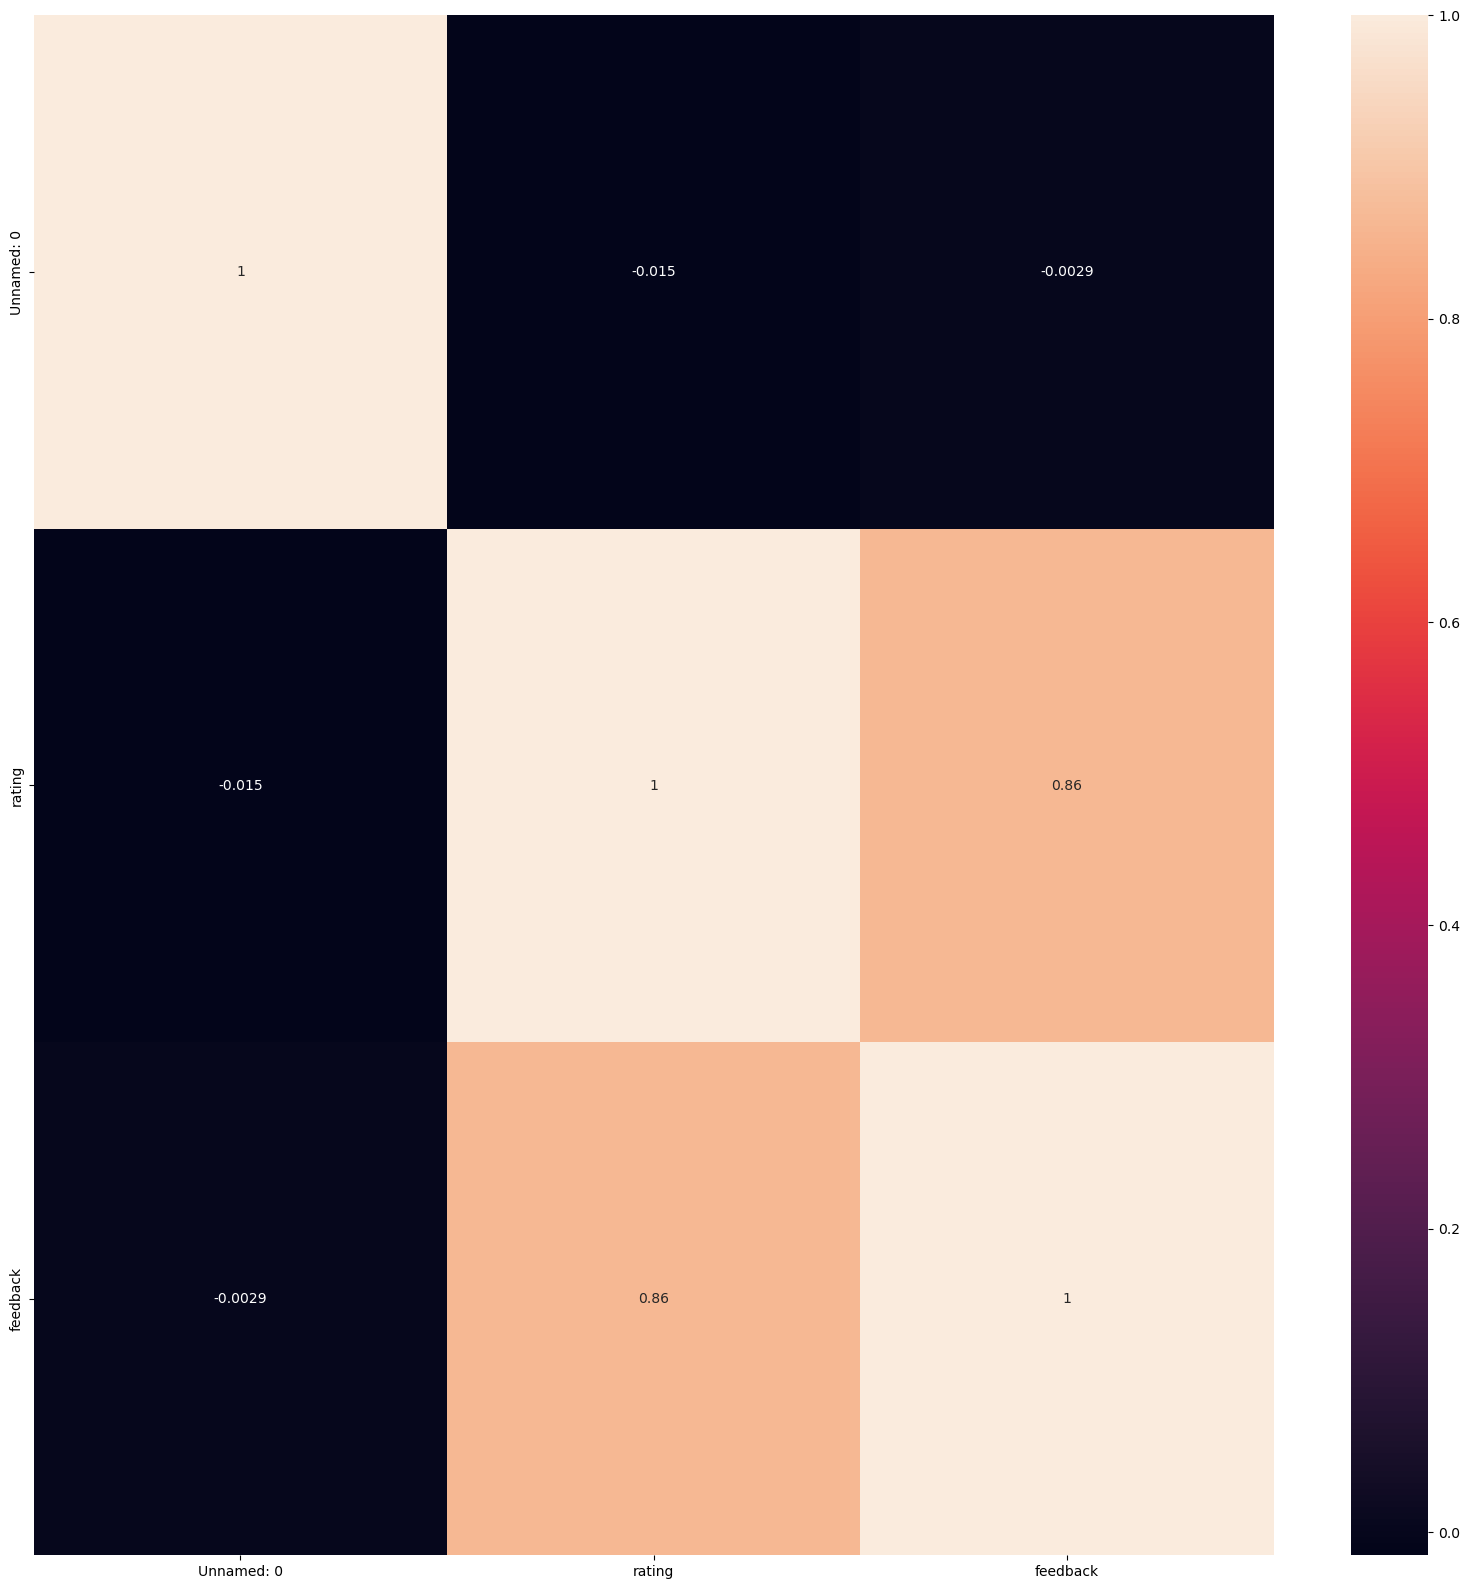

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [11]:
#import natural language tool kit
import nltk

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
lm=WordNetLemmatizer()

In [14]:
s=stopwords.words('english')
print(s)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
import re

# Method-1 To Clean Data

In [16]:
def cleaning(msg):
    msg1=re.sub('[^A-Za-z0-9]',' ',msg)
    msg1=[i for i in msg1.split() if i.lower() not in s]
    return msg1

In [17]:
reviews=df['verified_reviews'].apply(cleaning)
print(reviews)

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, great, mostly, use...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object


# Method2-To Clean Data

In [52]:
msg=[]
for i in df['verified_reviews']:
    t=i.lower()                         #turn to lower case
    t=re.sub('[^A-Za-z0-9]',' ',t)      #replace all non alphabets and numbers
    t=word_tokenize(t)                  #word_tokenize
    t=[i for i in t if i not in s]      #remove stopwords
    t=[lm.lemmatize(i) for i in t]      #apply lemmatization
    t=" ".join(t)                      
    msg.append(t)
print(msg)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing 4 yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think 5th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent 85 year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give some

# Count Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv=CountVectorizer()

In [21]:
cv1=cv.fit_transform(msg).toarray()
print(cv1)
print(type(cv1))
print(len(cv1))
print(cv1.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
3150
(3150, 3548)


In [22]:
cv2=cv.get_feature_names_out()
print(cv2)
print(len(cv2))

['00' '000' '07' ... 'zonked' 'zzzz' 'zzzzzzz']
3548


# TF-IDF Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
Tfidf=TfidfVectorizer()

In [25]:
Tfidf1=Tfidf.fit_transform(msg).toarray()
print(Tfidf1)
print(type(Tfidf1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


In [26]:
Tfidf2=Tfidf.get_feature_names_out()
print(Tfidf2)
print(len(Tfidf2))

['00' '000' '07' ... 'zonked' 'zzzz' 'zzzzzzz']
3548


In [27]:
df.shape

(3150, 6)

In [28]:
print(cv1.shape)

(3150, 3548)


In [29]:
x= pd.DataFrame(cv1)
print(x)

      0     1     2     3     4     5     6     7     8     9     ...  3538  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3145     0     0     0     0     0     0     0     0     0     0  ...     0   
3146     0     0     0     0     0     0     0     0     0     0  ...     0   
3147     0     0     0     0     0     0     0     0     0     0  ...     0   
3148     0     0     0     0     0     0     0     0     0     0  ...     0   
3149     0     0     0     0     0     0     0     0     0     0  ...     0   

      3539  3540  3541  3542  3543  3544  3545  354

In [30]:
y= df['feedback']
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


# Split Dataset Into Training And Test Dataset

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print("confusion_matrix")
    print(confusion_matrix(y_test, y_pred))
    print("classification matrix")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values',color='green')
    plt.ylabel('Actual Values',color='green')
    plt.title(plt_title,color='red')
    plt.show()

In [33]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2665,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y_train

1989    1
2497    1
2267    1
3100    1
2665    0
       ..
1775    1
1452    1
947     1
2382    1
2569    1
Name: feedback, Length: 2362, dtype: int64

# Multinomial Naive-Bayes Classification

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
naiveclassifer=MultinomialNB()
naiveclassifer.fit(x_train,y_train)

MultinomialNB()

In [37]:
y_pred=naiveclassifer.predict(x_test)
print(y_pred)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 

# Accuracy Score

In [38]:
print("accurary score of MultinomialNB:",100*accuracy_score(y_test,y_pred))

accurary score of MultinomialNB: 94.03553299492386


# Confusion And Classification Matrix

confusion_matrix
[[ 19  39]
 [  8 722]]
classification matrix
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        58
           1       0.95      0.99      0.97       730

    accuracy                           0.94       788
   macro avg       0.83      0.66      0.71       788
weighted avg       0.93      0.94      0.93       788



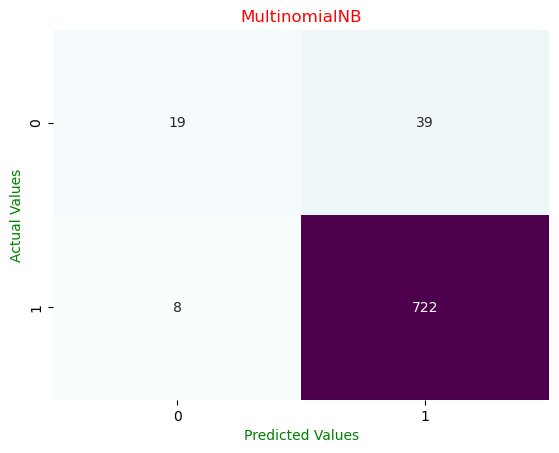

In [39]:
my_confusion_matrix(y_test, y_pred, 'MultinomialNB')

# KNeighbour Classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

## Remove Warnings

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
y1_pred=KNN.predict(x_test)
y1_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##  Accuracy Score

In [44]:
print("accuracy score of KNeighborsClassifer:",100*accuracy_score(y1_pred,y_test))

accuracy score of KNeighborsClassifer: 92.51269035532995


## Confusion And Classification Matrix

confusion_matrix
[[ 19  39]
 [  8 722]]
classification matrix
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        58
           1       0.95      0.99      0.97       730

    accuracy                           0.94       788
   macro avg       0.83      0.66      0.71       788
weighted avg       0.93      0.94      0.93       788



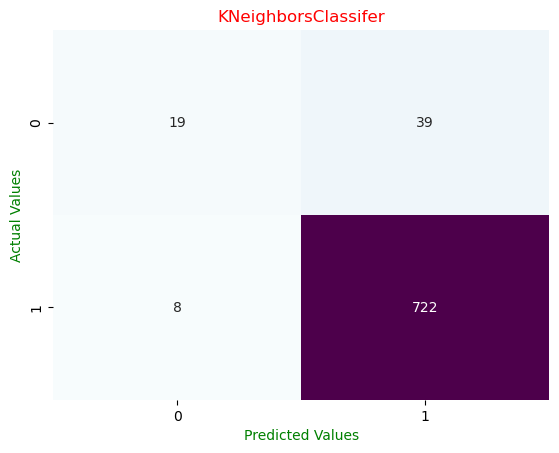

In [45]:
my_confusion_matrix(y_test, y_pred, 'KNeighborsClassifer')

## Logistic Regression classification

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [48]:
y3_pred=logistic.predict(x_test)
y3_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##  Accuracy Score

In [49]:
print("accuracy score of LogisticRegression:",100*accuracy_score(y_test,y3_pred))

accuracy score of LogisticRegression: 94.9238578680203


## Confusion And Classification Matrix

confusion_matrix
[[ 19  39]
 [  8 722]]
classification matrix
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        58
           1       0.95      0.99      0.97       730

    accuracy                           0.94       788
   macro avg       0.83      0.66      0.71       788
weighted avg       0.93      0.94      0.93       788



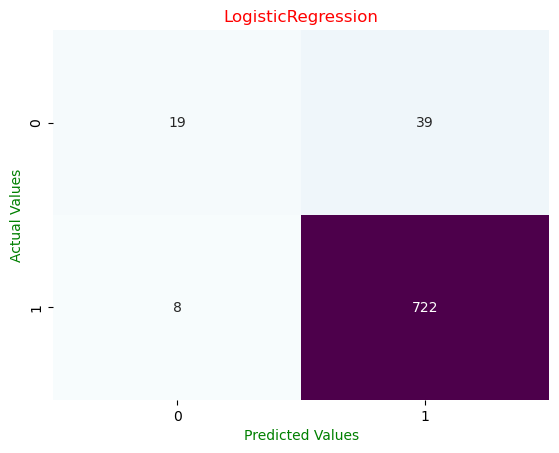

In [50]:
my_confusion_matrix(y_test, y_pred, 'LogisticRegression')

## The below are the accuracy score of 
## a) Multinomial Naïve Bayes Classification-------94.9238578680203
## b) Logistic Regression----------------------------------93.90862944162437
## c) KNeighborsClassifier--------------------------------91.11675126903553
## Among the three classification model Multinomial Naive Bayes Classification is have high accuracy

# SO THE MULTINOMIAL NAIVE BAYES CLASSIFICATION IS BEST MODEL